In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


Para demonstrar e explicar os efeitos das técnicas de manipulação de dados numéricos em machine learning, vamos utilizar gráficos para visualizar os dados antes e depois da aplicação de cada técnica. Para isso, usaremos bibliotecas como `matplotlib` e `seaborn`. Vamos começar com a discretização de variáveis contínuas.



### 1.3 Discretização de variáveis contínuas por meio de quantização com bins fixos

**Gráfico 1: Discretização com `pd.cut`**

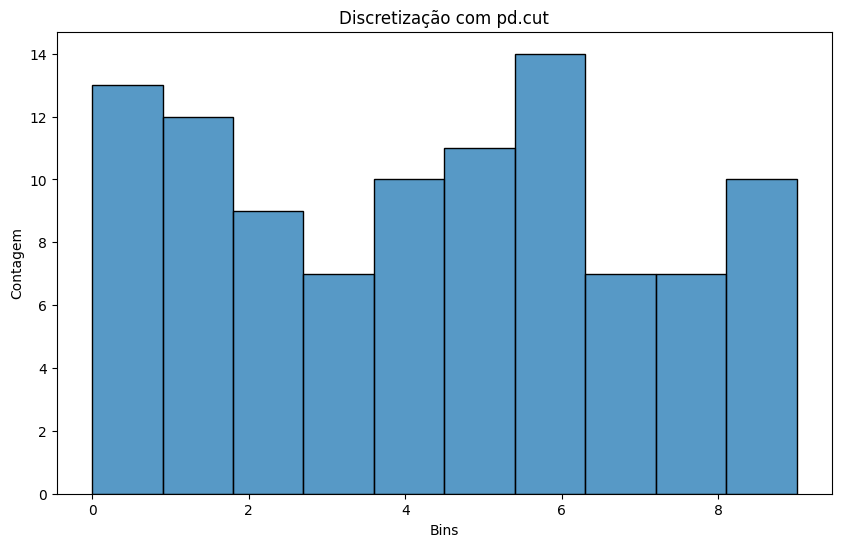

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
np.random.seed(0)
data = {'valor': np.random.rand(100) * 100}
df = pd.DataFrame(data)

# Discretização com bins fixos
df['binned'] = pd.cut(df['valor'], bins=10, labels=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df['binned'], bins=10, kde=False)
plt.title('Discretização com pd.cut')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `pd.cut` para dividir esses valores em 10 bins de tamanho igual.
3. Visualizamos a distribuição dos dados discretizados com um histograma.

**Gráfico 2: Discretização com `np.digitize`**

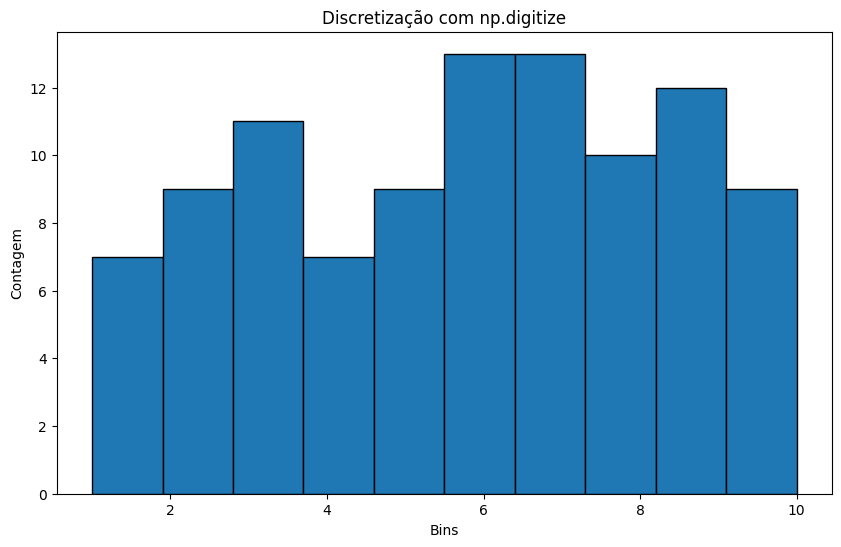

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
data = np.random.rand(100) * 100

# Definindo os limites dos bins
bins = np.linspace(0, 100, 11)

# Discretização com bins fixos
binned_data = np.digitize(data, bins)

# Gráfico
plt.figure(figsize=(10, 6))
plt.hist(binned_data, bins=10, edgecolor='black')
plt.title('Discretização com np.digitize')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Definimos 11 pontos de limite para 10 bins usando `np.linspace`.
3. Usamos `np.digitize` para categorizar os dados com base nesses limites.
4. Visualizamos a distribuição dos dados discretizados com um histograma.



**Gráfico 3: Comparação entre `pd.cut` e `pd.qcut`**

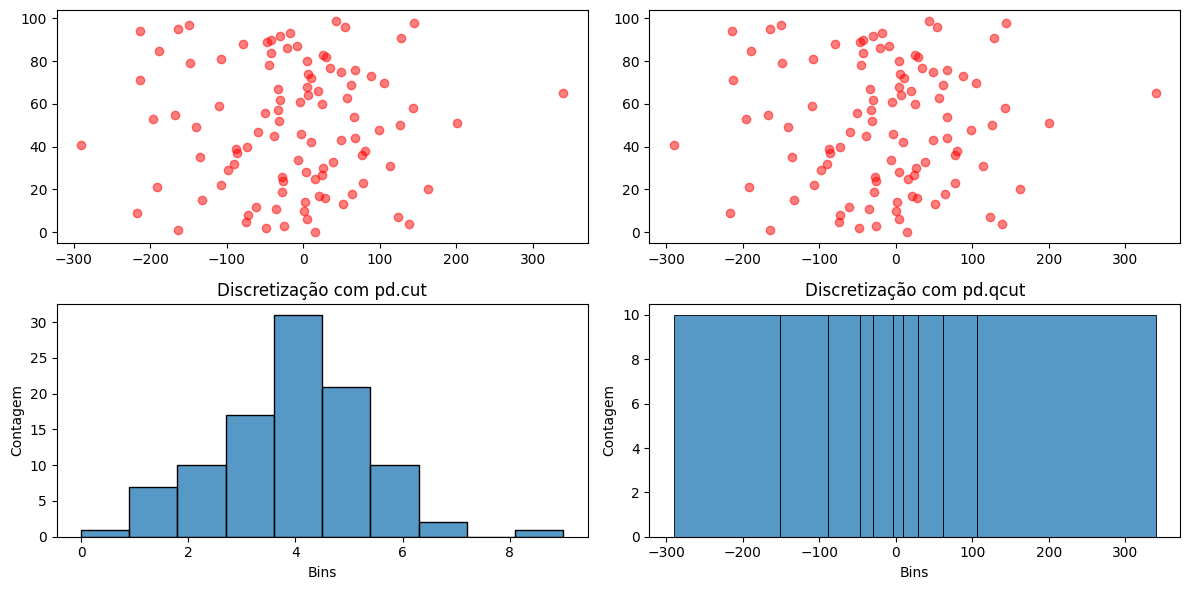

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = {'valor': np.random.randn(100) * 100}
df = pd.DataFrame(data)

# Discretização com bins fixos usando pd.cut
df['binned_cut'] = pd.cut(df['valor'], bins=10, labels=False)

# Discretização com bins variáveis usando pd.qcut
df['binned_qcut'], edges = pd.qcut(df['valor'], q=10, labels=False, retbins=True)

# Gráficos
plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
plt.scatter(df['valor'], range(len(df['valor'])),c='red', alpha = 0.5)

plt.subplot(222)
plt.scatter(df['valor'], range(len(df['valor'])),c='red', alpha = 0.5)

plt.subplot(2, 2, 3)
sns.histplot(df['binned_cut'], bins=10, kde=False)
plt.title('Discretização com pd.cut')
plt.xlabel('Bins')
plt.ylabel('Contagem')

plt.subplot(2, 2, 4)
sns.histplot(df['valor'], bins=edges, kde=False)
plt.title('Discretização com pd.qcut')
plt.xlabel('Bins')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Discretizamos os dados em 10 bins de tamanho igual usando `pd.cut` e em 10 bins com aproximadamente o mesmo número de pontos de dados usando `pd.qcut`.
3. Comparamos a distribuição dos dados discretizados com histogramas lado a lado.

### 1.4 Discretização de variáveis contínuas por meio de quantização com bins variáveis

**Gráfico 4: Discretização com `pd.qcut`**

Os dados agrupados a cada 1/10 da quantidade de dados:

0      4
1      7
2      4
3      3
4      5
      ..
995    0
996    0
997    4
998    9
999    9
Name: binned, Length: 1000, dtype: int64


Os valores que delilmitam os intervalos:	 [ 39.5788424   76.44296793  84.59735707  90.43121444  95.6496852
 100.65787804 106.63812479 112.05720383 118.1705976  126.46912368
 159.14910285]


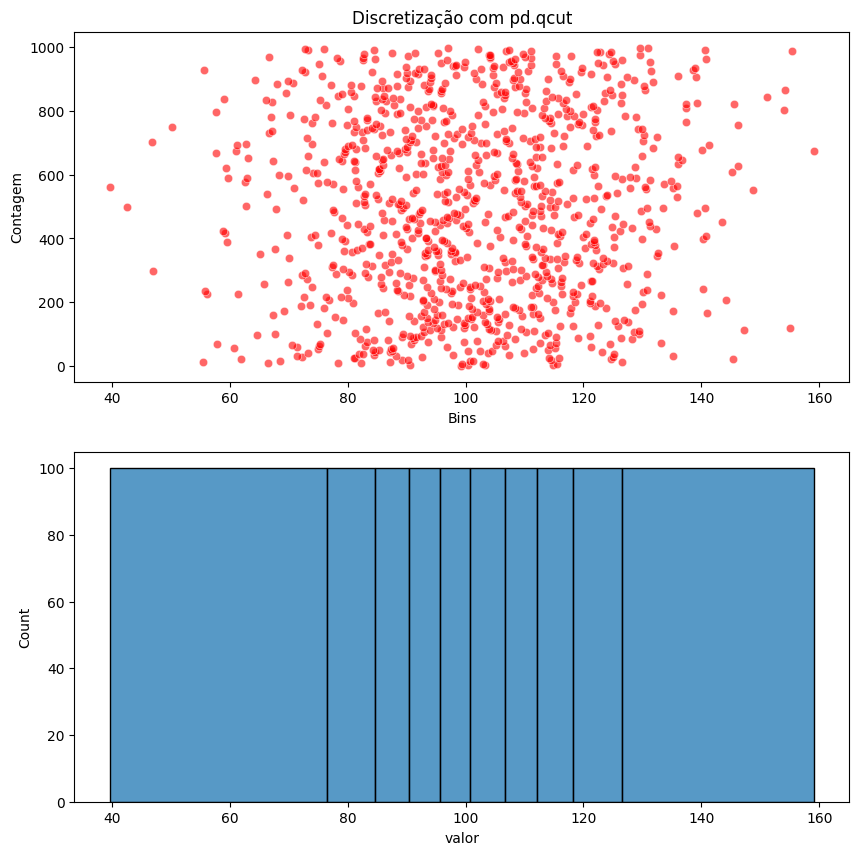

,valor,binned
0,99.225514,4
1,114.796677,7
2,100.418455,4
3,90.564547,3
4,103.203605,5
...,...,...
995,72.748323,0
996,75.891994,0
997,96.979331,4
998,129.582574,9


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = {'valor': np.random.randn(1000) * 20 + 100 }
df = pd.DataFrame(data)

# Discretização com bins variáveis
df['binned'], intervalos = pd.qcut(df['valor'], q=10, labels=False, retbins=True)
print('Os dados agrupados a cada 1/10 da quantidade de dados:\n')
print(df['binned'])

print('\n\nOs valores que delilmitam os intervalos:\t', intervalos)
# Plotagem dos dados discretizados


plt.figure(figsize=(10, 10))
plt.subplot(2,1,2)
sns.histplot(df['valor'], bins=intervalos, kde=False)
plt.subplot(2,1,1)
sns.scatterplot(y = range(len(df['valor'])), x= df['valor'], c='red', alpha=0.6)
plt.title('Discretização com pd.qcut')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

df

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `pd.qcut` para dividir esses valores em 10 bins com aproximadamente o mesmo número de pontos de dados.
3. Visualizamos a distribuição dos dados discretizados com um histograma.

**Gráfico 5: Discretização com `np.percentile`**

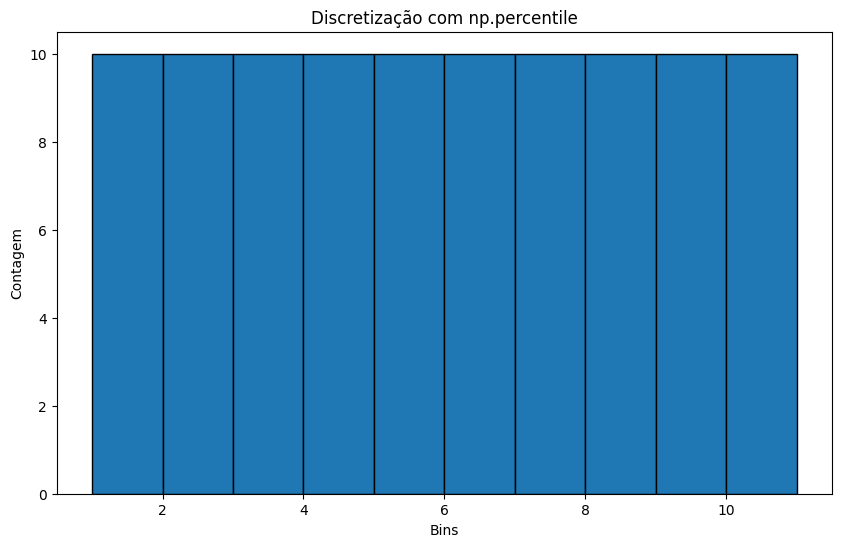

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
data = np.random.rand(100) * 100

# Definindo os percentis para os bins variáveis
percentiles = np.percentile(data, np.arange(0, 101, 10))

# Discretização com bins variáveis
binned_data = np.digitize(data, percentiles)

# Gráfico
plt.figure(figsize=(10, 6))
plt.hist(binned_data, bins=10, edgecolor='black')
plt.title('Discretização com np.percentile')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Calculamos os percentis para dividir os dados em 10 bins.
3. Usamos `np.digitize` para categorizar os dados com base nesses percentis.
4. Visualizamos a distribuição dos dados discretizados com um histograma.

**Gráfico 6: Discretização com `KBinsDiscretizer`**

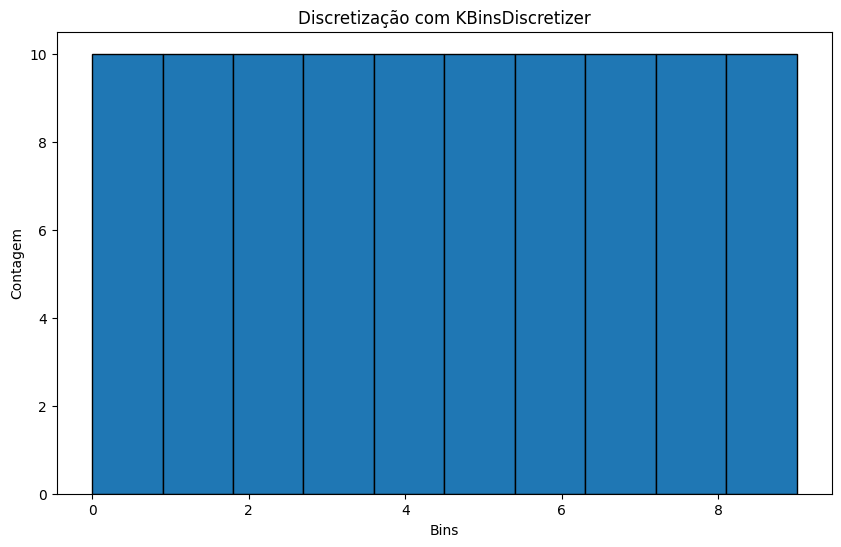

In [7]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do KBinsDiscretizer com estratégia 'quantile'
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data_binned = est.fit_transform(data)

# Gráfico
plt.figure(figsize=(10, 6))
plt.hist(data_binned, bins=10, edgecolor='black')
plt.title('Discretização com KBinsDiscretizer')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `KBinsDiscretizer` com a estratégia 'quantile' para criar 10 bins com aproximadamente o mesmo número de pontos de dados.
3. Visualizamos a distribuição dos dados discretizados com um histograma.



### 1.5 Utilizar a FunctionTransformer do sklearn em uma variável

**Gráfico 7: Aplicação de logaritmo natural**

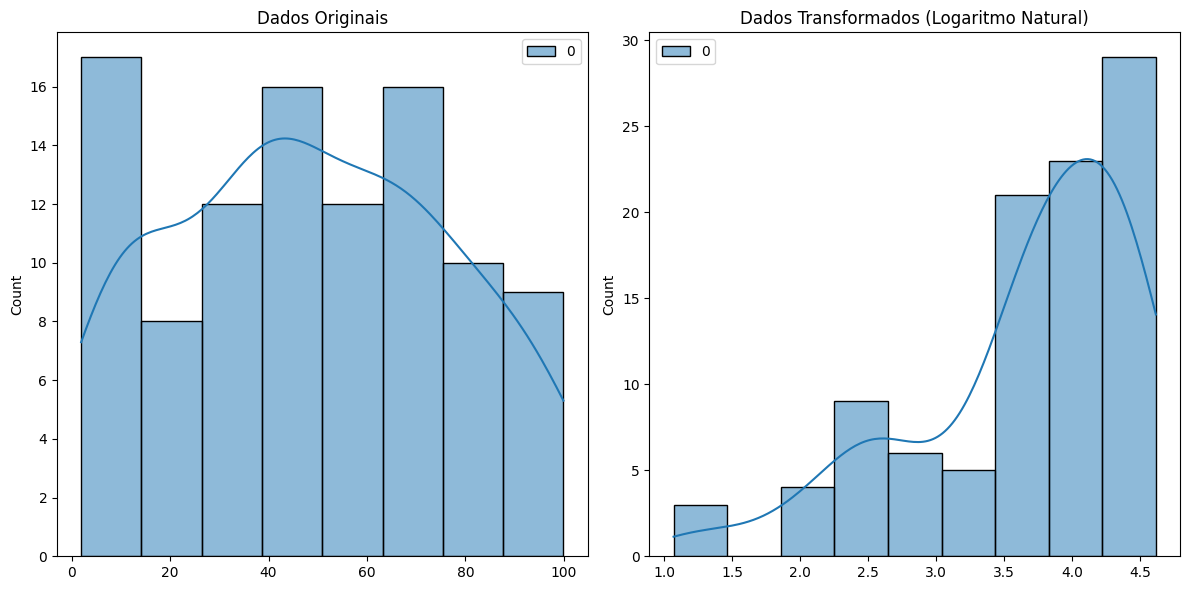

In [8]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Função de exemplo: logaritmo natural
def log_transform(x):
    return np.log1p(x)

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do FunctionTransformer
transformer = FunctionTransformer(log_transform)
data_transformed = transformer.fit_transform(data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title('Dados Originais')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, kde=True)
plt.title('Dados Transformados (Logaritmo Natural)')

plt.tight_layout()
plt.show()

**Explicação**:
1. Definimos uma função que aplica o logaritmo natural.
2. Geramos 100 valores aleatórios entre 0 e 100.
3. Usamos `FunctionTransformer` para aplicar a função logaritmo natural aos dados.
4. Comparamos a distribuição dos dados originais e transformados com histogramas lado a lado.

**Gráfico 8: Aplicação de raiz quadrada**

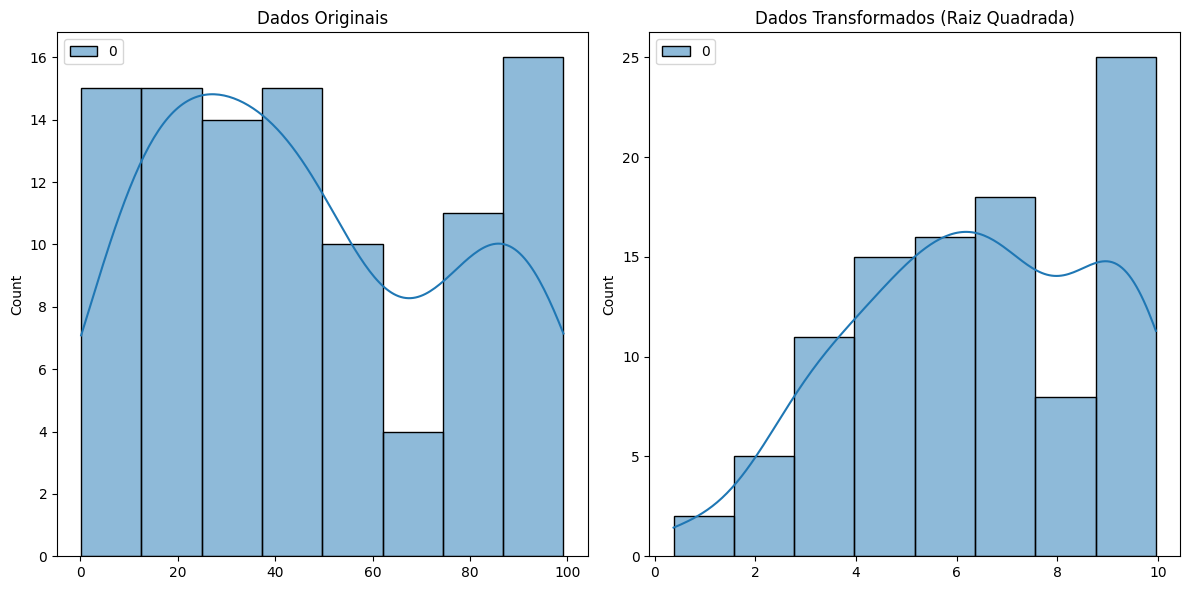

In [9]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Função de exemplo: raiz quadrada
def sqrt_transform(x):
    return np.sqrt(x)

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do FunctionTransformer
transformer = FunctionTransformer(sqrt_transform)
data_transformed = transformer.fit_transform(data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title('Dados Originais')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, kde=True)
plt.title('Dados Transformados (Raiz Quadrada)')

plt.tight_layout()
plt.show()

**Explicação**:
1. Definimos uma função que aplica a raiz quadrada.
2. Geramos 100 valores aleatórios entre 0 e 100.
3. Usamos `FunctionTransformer` para aplicar a função raiz quadrada aos dados.
4. Comparamos a distribuição dos dados originais e transformados com histogramas lado a lado.

**Gráfico 9: Aplicação de transformação personalizada**

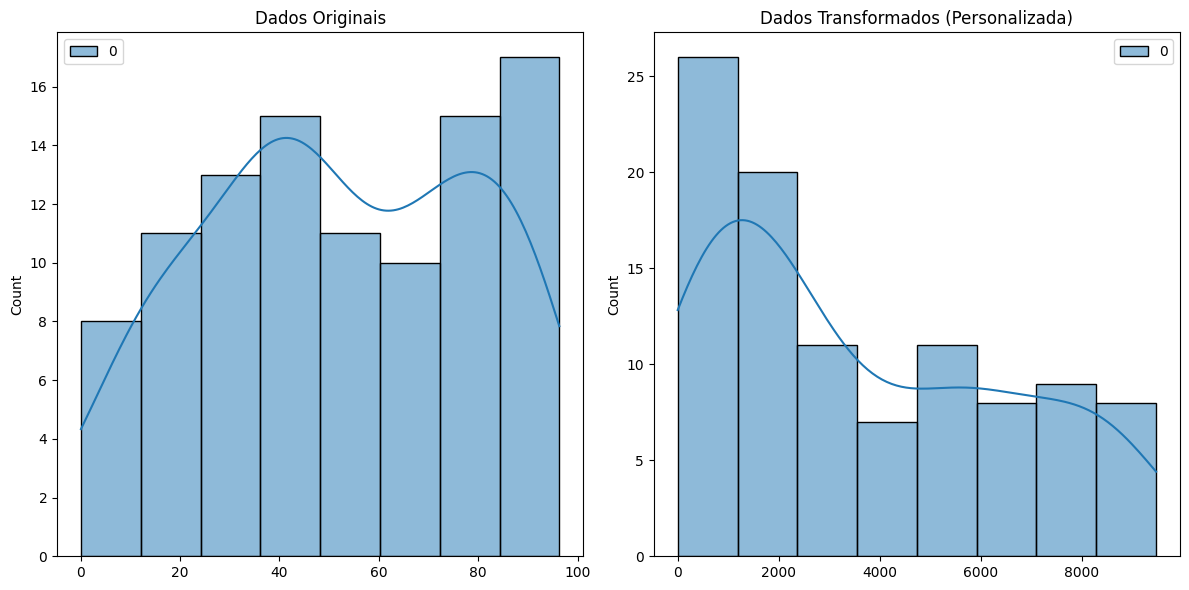

In [10]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Função de exemplo: transformação personalizada
def custom_transform(x):
    return x ** 2 + 2 * x + 1

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do FunctionTransformer
transformer = FunctionTransformer(custom_transform)
data_transformed = transformer.fit_transform(data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title('Dados Originais')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, kde=True)
plt.title('Dados Transformados (Personalizada)')

plt.tight_layout()
plt.show()

**Explicação**:
1. Definimos uma função que aplica uma transformação personalizada (quadrado da variável mais duas vezes a variável mais um).
2. Geramos 100 valores aleatórios entre 0 e 100.
3. Usamos `FunctionTransformer` para aplicar a transformação personalizada aos dados.
4. Comparamos a distribuição dos dados originais e transformados com histogramas lado a lado.

### 1.6 Utilizar a PowerTransformer do sklearn em uma variável

**Gráfico 10: Usando método 'yeo-johnson'**

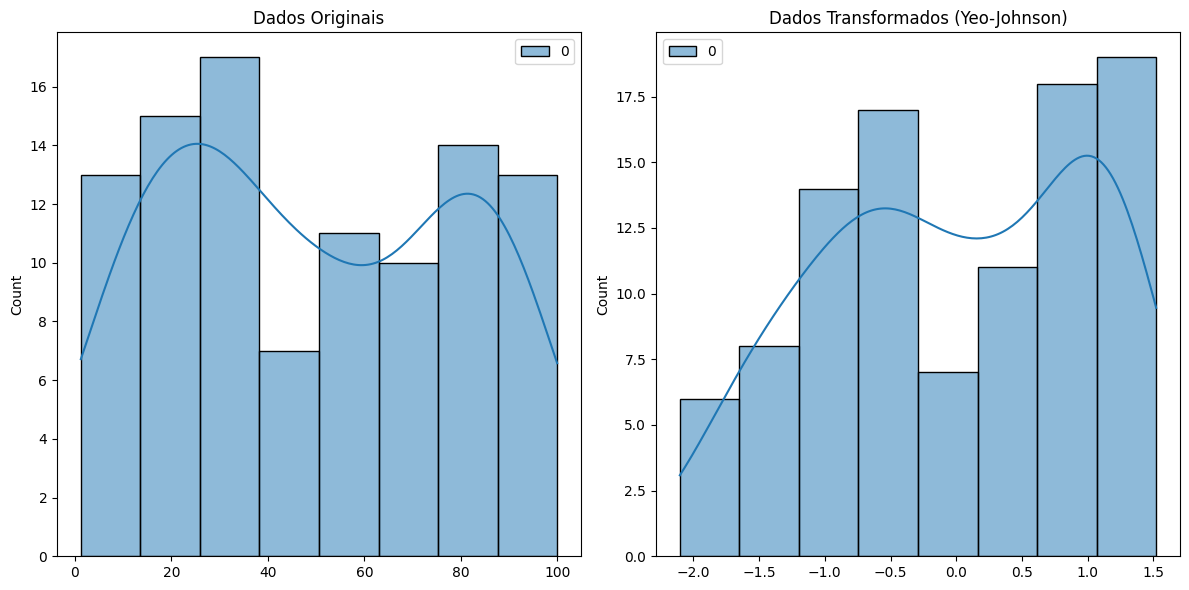

In [11]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do PowerTransformer com método 'yeo-johnson'
transformer = PowerTransformer(method='yeo-johnson')
data_transformed = transformer.fit_transform(data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title('Dados Originais')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, kde=True)
plt.title('Dados Transformados (Yeo-Johnson)')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `PowerTransformer` com o método 'yeo-johnson' para transformar os dados.
3. Comparamos a distribuição dos dados originais e transformados com histogramas lado a lado.

**Gráfico 11: Usando método 'box-cox'**

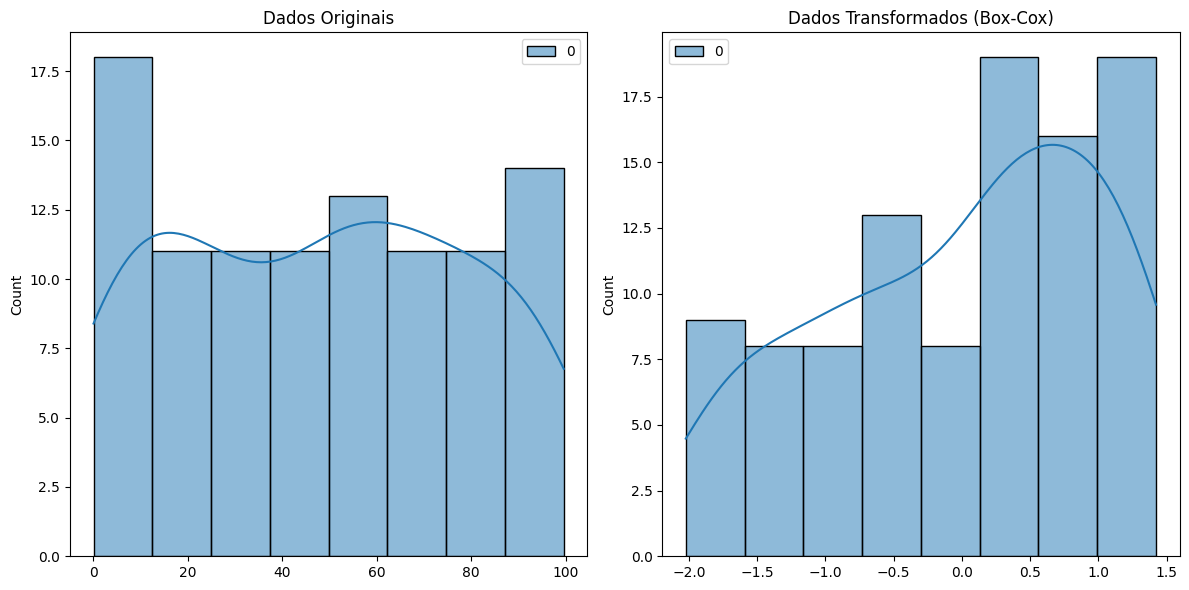

In [12]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do PowerTransformer com método 'box-cox'
transformer = PowerTransformer(method='box-cox')
data_transformed = transformer.fit_transform(data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title('Dados Originais')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, kde=True)
plt.title('Dados Transformados (Box-Cox)')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `PowerTransformer` com o método 'box-cox' para transformar os dados.
3. Comparamos a distribuição dos dados originais e transformados com histogramas lado a lado.

**Gráfico 12: Comparação entre 'yeo-johnson' e 'box-cox'**

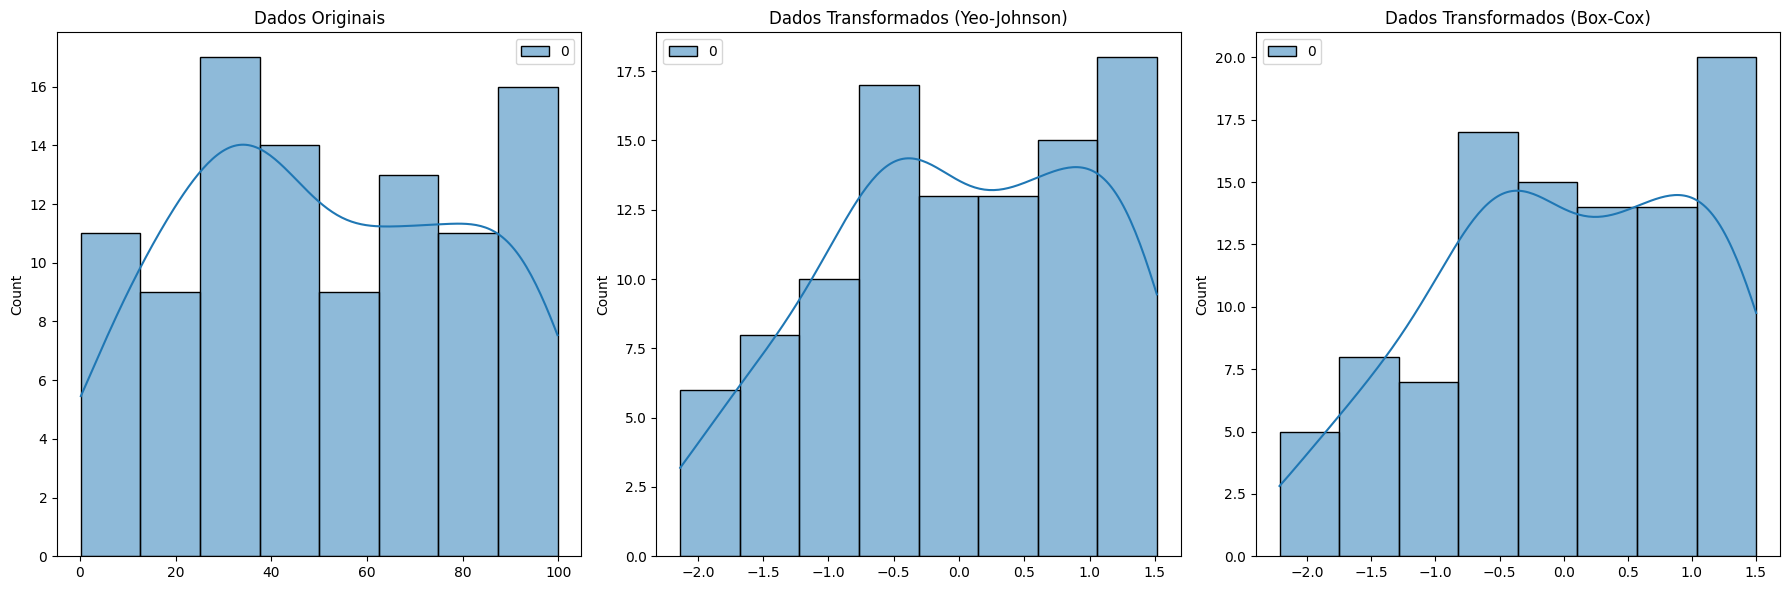

In [13]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do PowerTransformer com método 'yeo-johnson'
transformer_yeo_johnson = PowerTransformer(method='yeo-johnson')
data_yeo_johnson = transformer_yeo_johnson.fit_transform(data)

# Aplicação do PowerTransformer com método 'box-cox'
transformer_box_cox = PowerTransformer(method='box-cox')
data_box_cox = transformer_box_cox.fit_transform(data)

# Gráficos
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data, kde=True)
plt.title('Dados Originais')

plt.subplot(1, 3, 2)
sns.histplot(data_yeo_johnson, kde=True)
plt.title('Dados Transformados (Yeo-Johnson)')

plt.subplot(1, 3, 3)
sns.histplot(data_box_cox, kde=True)
plt.title('Dados Transformados (Box-Cox)')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Aplicamos `PowerTransformer` com os métodos 'yeo-johnson' e 'box-cox' para transformar os dados.
3. Comparamos a distribuição dos dados originais e transformados com histogramas lado a lado.

### 1.7 Utilizar a normalização Min-Max do sklearn para garantir que os dados estão na mesma faixa-dinâmica

**Gráfico 13: Normalização Min-Max padrão**

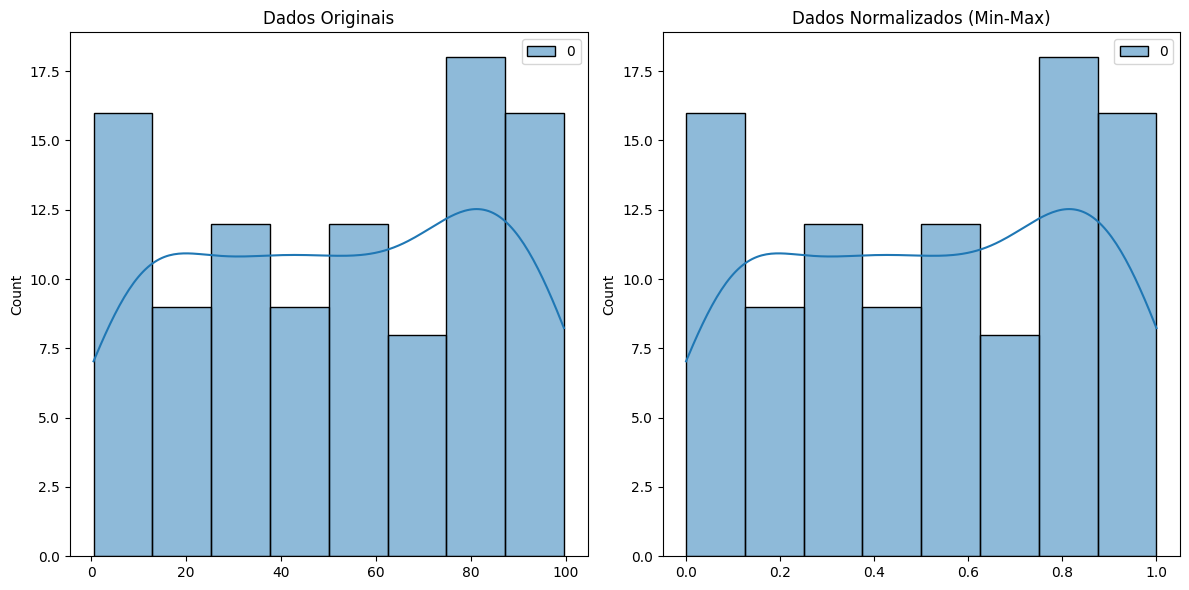

In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do Min-Max Scaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title('Dados Originais')

plt.subplot(1, 2, 2)
sns.histplot(data_normalized, kde=True)
plt.title('Dados Normalizados (Min-Max)')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `MinMaxScaler` para transformar os dados para a faixa entre 0 e 1.
3. Comparamos a distribuição dos dados originais e normalizados com histogramas lado a lado.

**Gráfico 14: Normalização Min-Max com faixa personalizada**

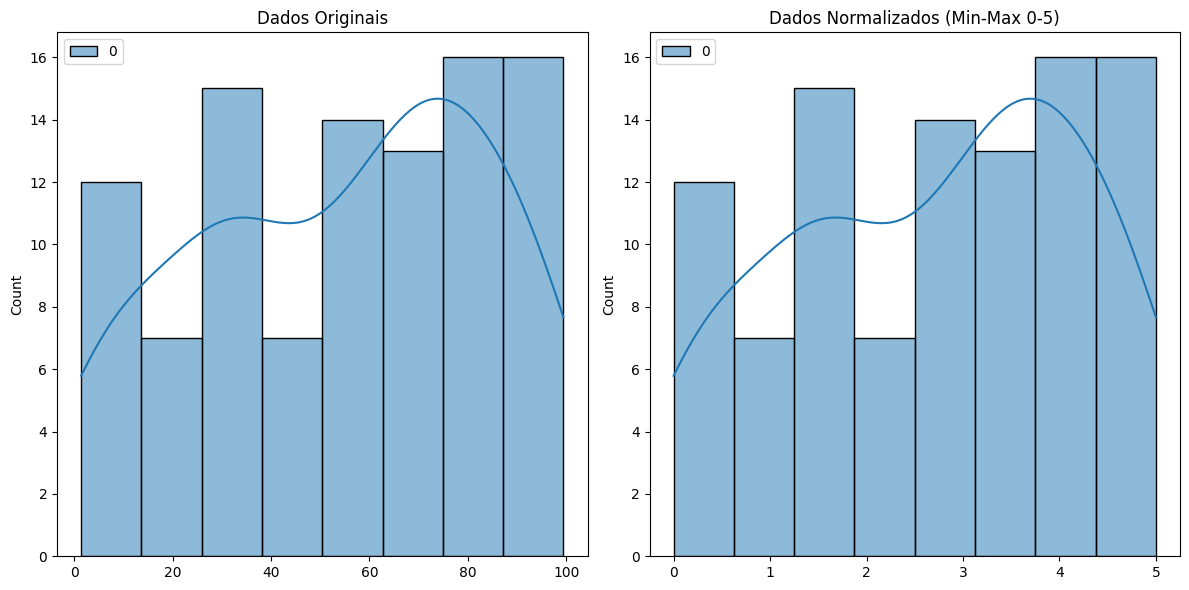

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do Min-Max Scaler com faixa personalizada
scaler = MinMaxScaler(feature_range=(0, 5))
data_normalized = scaler.fit_transform(data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title('Dados Originais')

plt.subplot(1, 2, 2)
sns.histplot(data_normalized, kde=True)
plt.title('Dados Normalizados (Min-Max 0-5)')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `MinMaxScaler` para transformar os dados para a faixa entre 0 e 5.
3. Comparamos a distribuição dos dados originais e normalizados com histogramas lado a lado.

**Gráfico 15: Normalização Min-Max em várias features**

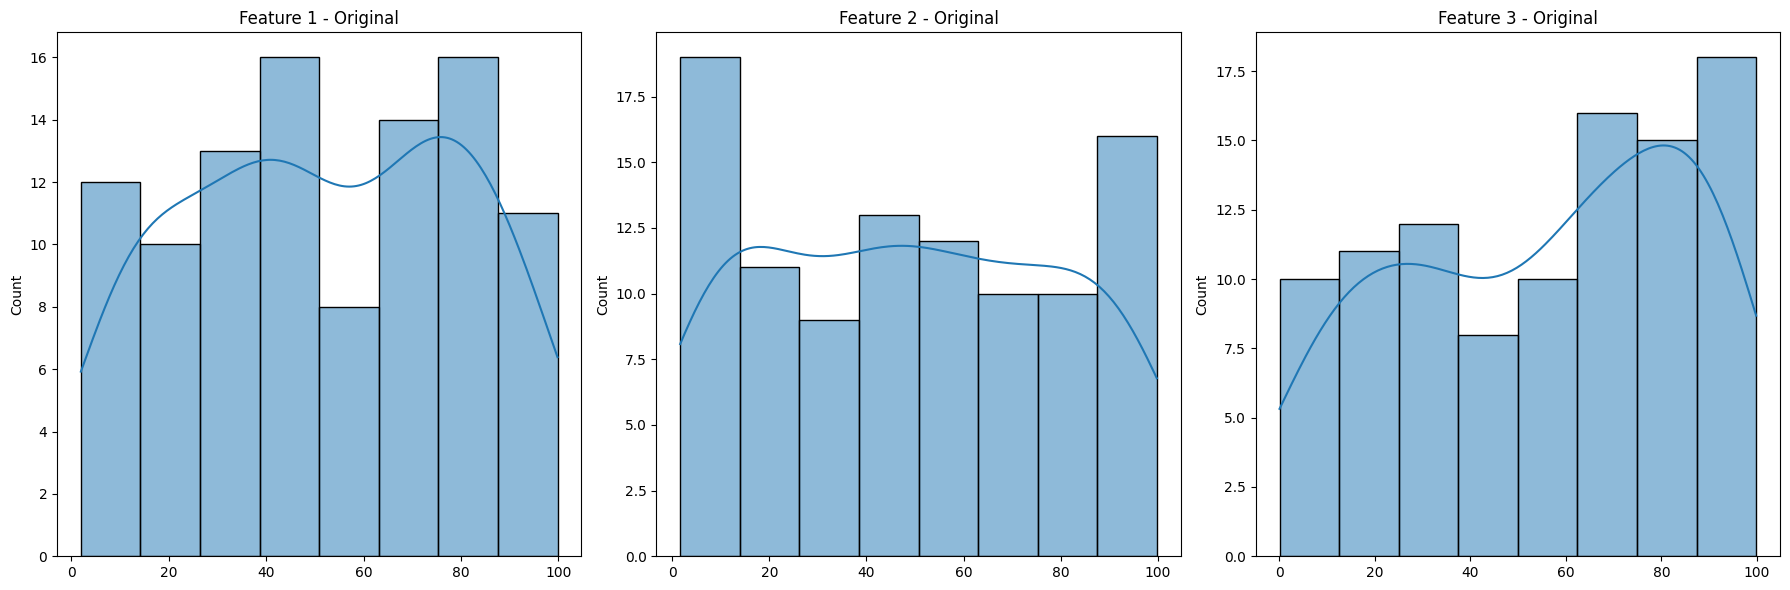

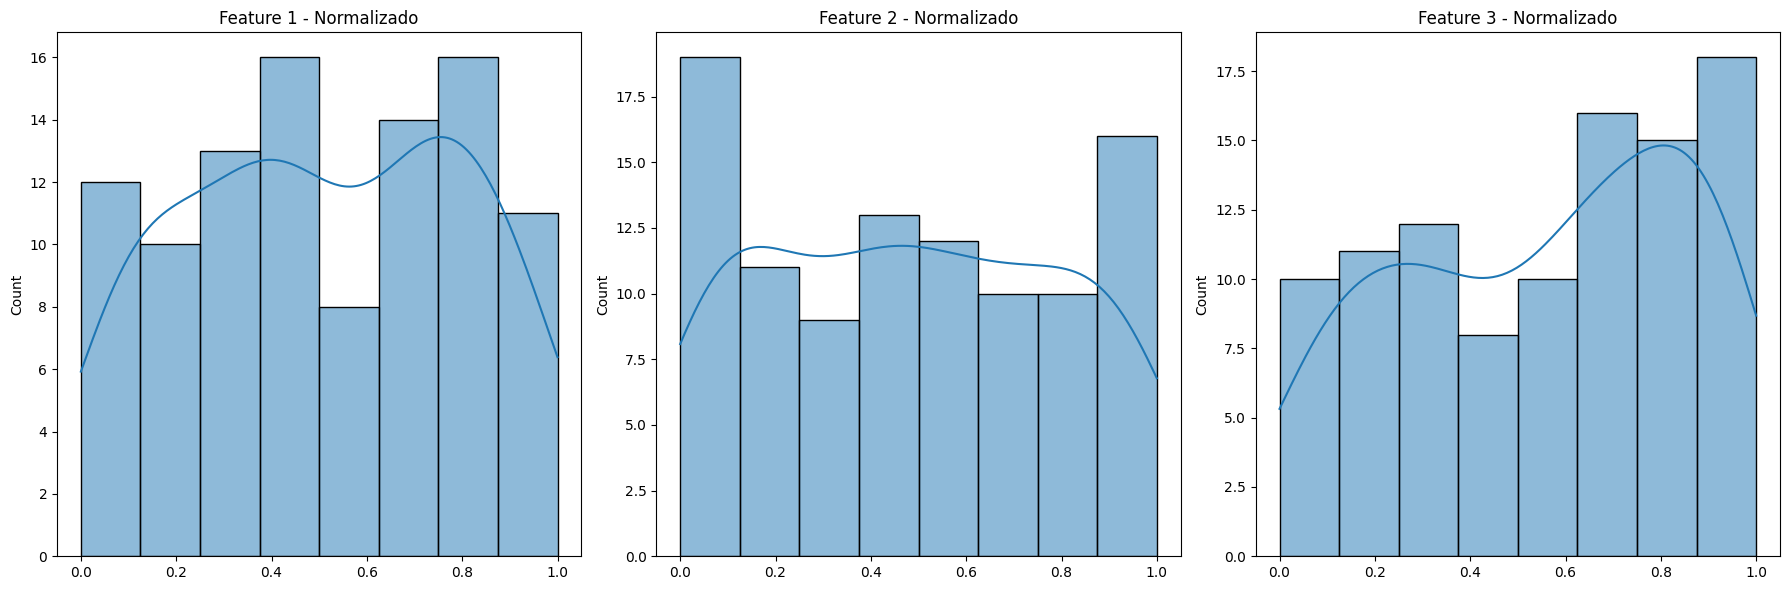

In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo com múltiplas features
data = np.random.rand(100, 3) * 100

# Aplicação do Min-Max Scaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Gráficos
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data[:, 0], kde=True)
plt.title('Feature 1 - Original')

plt.subplot(1, 3, 2)
sns.histplot(data[:, 1], kde=True)
plt.title('Feature 2 - Original')

plt.subplot(1, 3, 3)
sns.histplot(data[:, 2], kde=True)
plt.title('Feature 3 - Original')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data_normalized[:, 0], kde=True)
plt.title('Feature 1 - Normalizado')

plt.subplot(1, 3, 2)
sns.histplot(data_normalized[:, 1], kde=True)
plt.title('Feature 2 - Normalizado')

plt.subplot(1, 3, 3)
sns.histplot(data_normalized[:, 2], kde=True)
plt.title('Feature 3 - Normalizado')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 

100 para três features.
2. Usamos `MinMaxScaler` para transformar os dados para a faixa entre 0 e 1.
3. Comparamos a distribuição dos dados originais e normalizados para cada feature com histogramas lado a lado.

### 1.8 Utilizar a normalização Standard Scaler

**Gráfico 16: Normalização StandardScaler padrão**

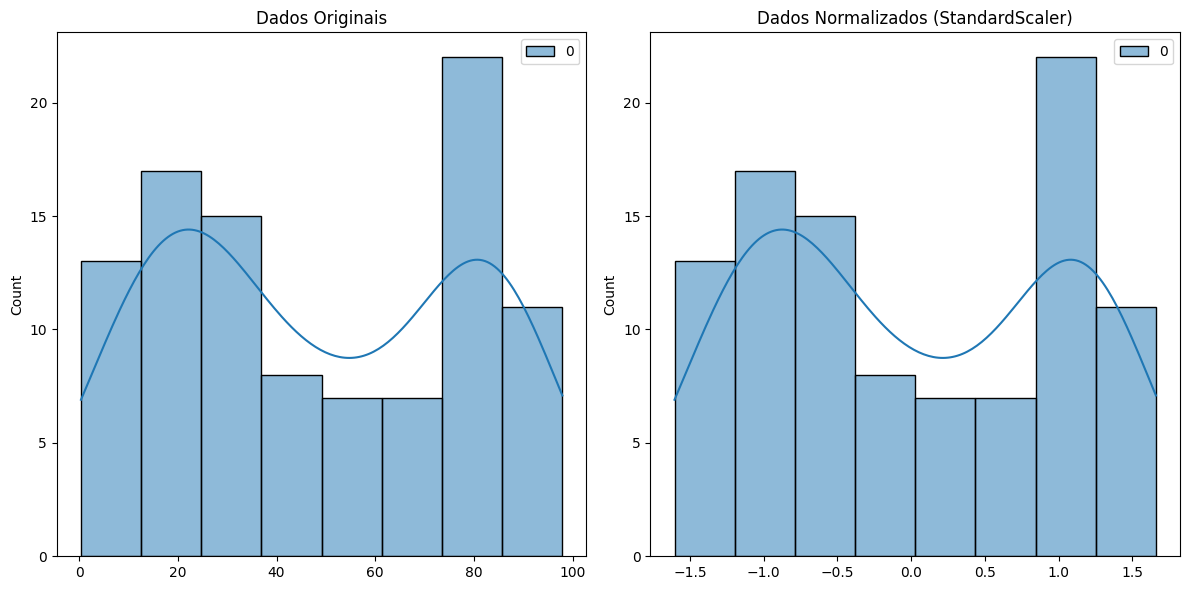

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Gráfico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title('Dados Originais')

plt.subplot(1, 2, 2)
sns.histplot(data_standardized, kde=True)
plt.title('Dados Normalizados (StandardScaler)')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `StandardScaler` para transformar os dados para que tenham média 0 e desvio padrão 1.
3. Comparamos a distribuição dos dados originais e normalizados com histogramas lado a lado.

**Gráfico 17: Normalização StandardScaler em múltiplas features**

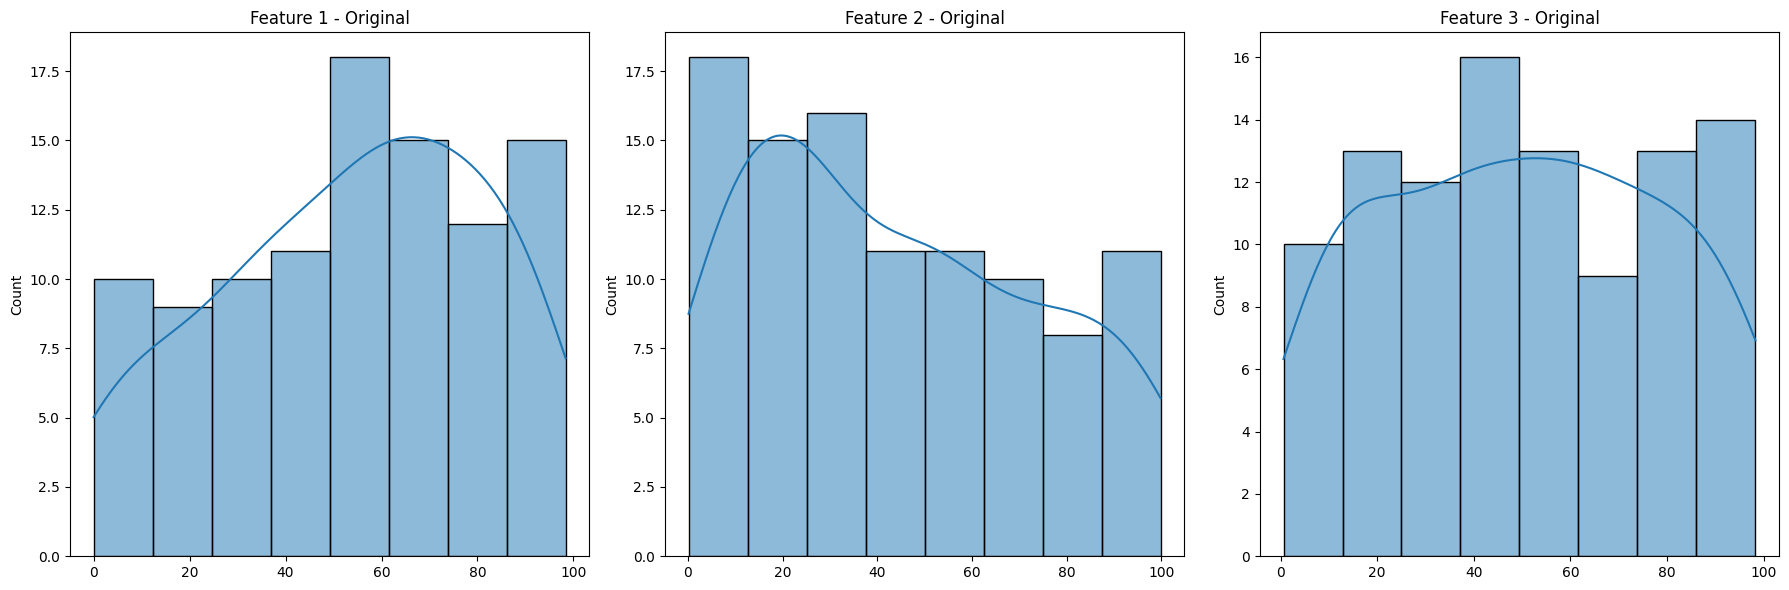

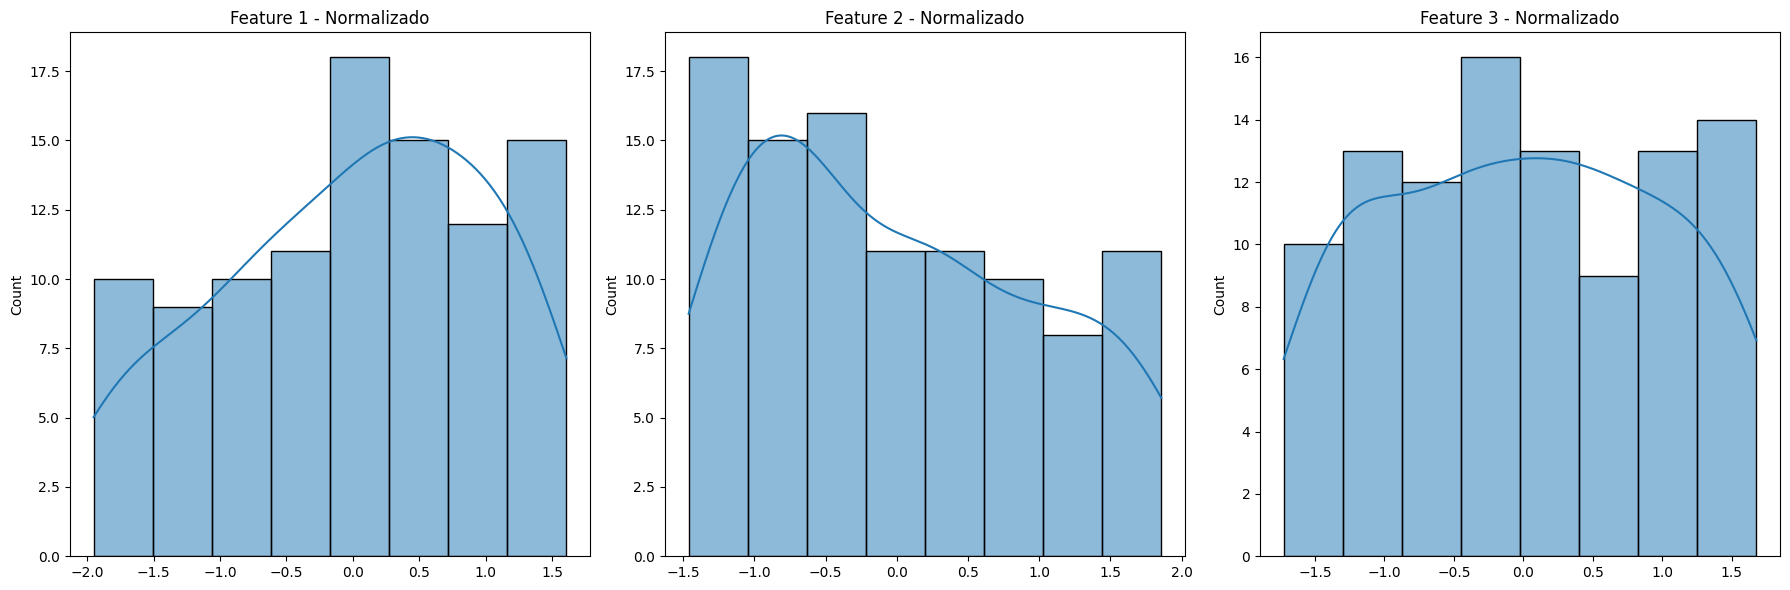

In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo com múltiplas features
data = np.random.rand(100, 3) * 100

# Aplicação do StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Gráficos
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data[:, 0], kde=True)
plt.title('Feature 1 - Original')

plt.subplot(1, 3, 2)
sns.histplot(data[:, 1], kde=True)
plt.title('Feature 2 - Original')

plt.subplot(1, 3, 3)
sns.histplot(data[:, 2], kde=True)
plt.title('Feature 3 - Original')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data_standardized[:, 0], kde=True)
plt.title('Feature 1 - Normalizado')

plt.subplot(1, 3, 2)
sns.histplot(data_standardized[:, 1], kde=True)
plt.title('Feature 2 - Normalizado')

plt.subplot(1, 3, 3)
sns.histplot(data_standardized[:, 2], kde=True)
plt.title('Feature 3 - Normalizado')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100 para três features.
2. Usamos `StandardScaler` para transformar os dados para que tenham média 0 e desvio padrão 1.
3. Comparamos a distribuição dos dados originais e normalizados para cada feature com histogramas lado a lado.

**Gráfico 18: Comparação antes e depois da normalização**

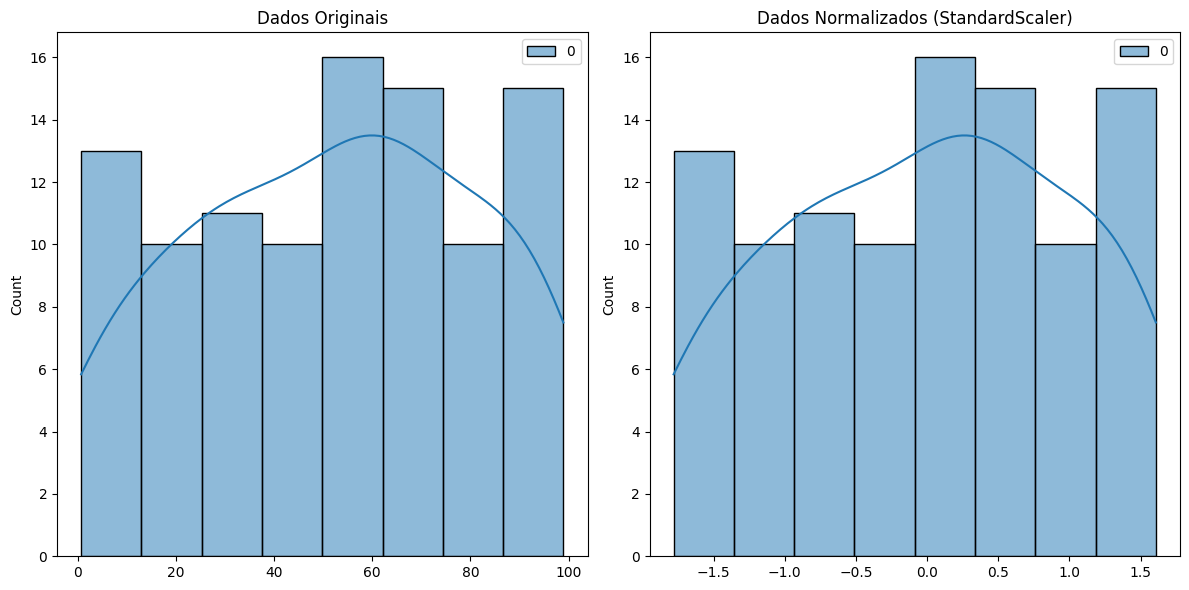

In [19]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = np.random.rand(100, 1) * 100

# Aplicação do StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Gráficos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title('Dados Originais')

plt.subplot(1, 2, 2)
sns.histplot(data_standardized, kde=True)
plt.title('Dados Normalizados (StandardScaler)')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `StandardScaler` para transformar os dados para que tenham média 0 e desvio padrão 1.
3. Comparamos a distribuição dos dados originais e normalizados com histogramas lado a lado.

### 1.9 Utilizar a regularização norma-l2

**Gráfico 19:** 

**Comparação entre Ridge e Linear Regression**

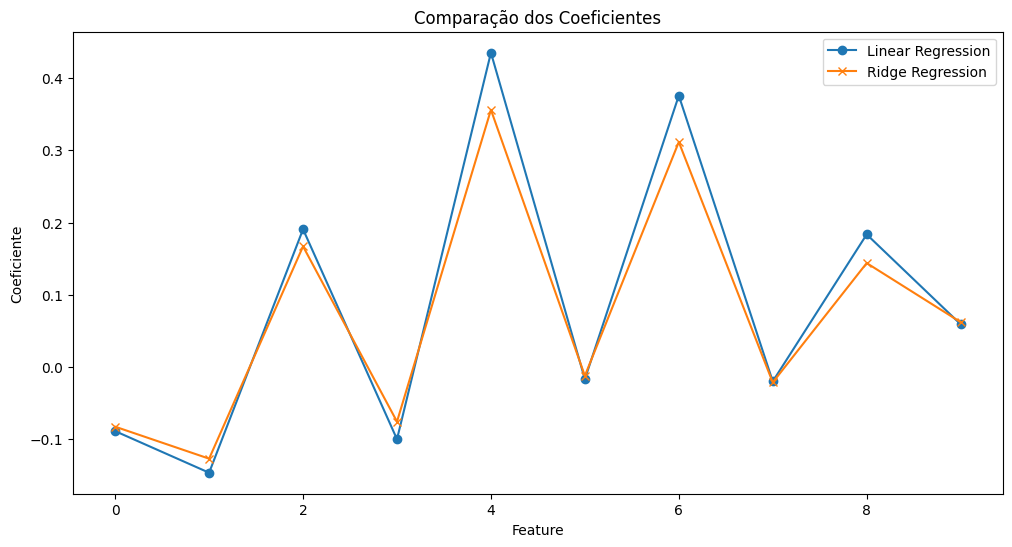

In [20]:
from sklearn.linear_model import Ridge, LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dados de exemplo
X = np.random.rand(100, 10)
y = np.random.rand(100)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicação da Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Aplicação da Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Gráfico
coef_lr = model_lr.coef_
coef_ridge = model_ridge.coef_

plt.figure(figsize=(12, 6))
plt.plot(coef_lr, label='Linear Regression', marker='o')
plt.plot(coef_ridge, label='Ridge Regression', marker='x')
plt.title('Comparação dos Coeficientes')
plt.xlabel('Feature')
plt.ylabel('Coeficiente')
plt.legend()
plt.show()

**Explicação**:
1. Geramos 100 pontos de dados com 10 features e um target contínuo aleatório.
2. Dividimos os dados em conjuntos de treino e teste.
3. Aplicamos `LinearRegression` e `Ridge` com `alpha=1.0`.
4. Comparamos os coeficientes dos dois modelos em um gráfico.

### 1.10 Selecionar as features úteis para o modelo usando uma das três técnicas: Filtragem, Wrapper e Embedding

**Gráfico 20: Usando `SelectKBest` com ANOVA F-test**

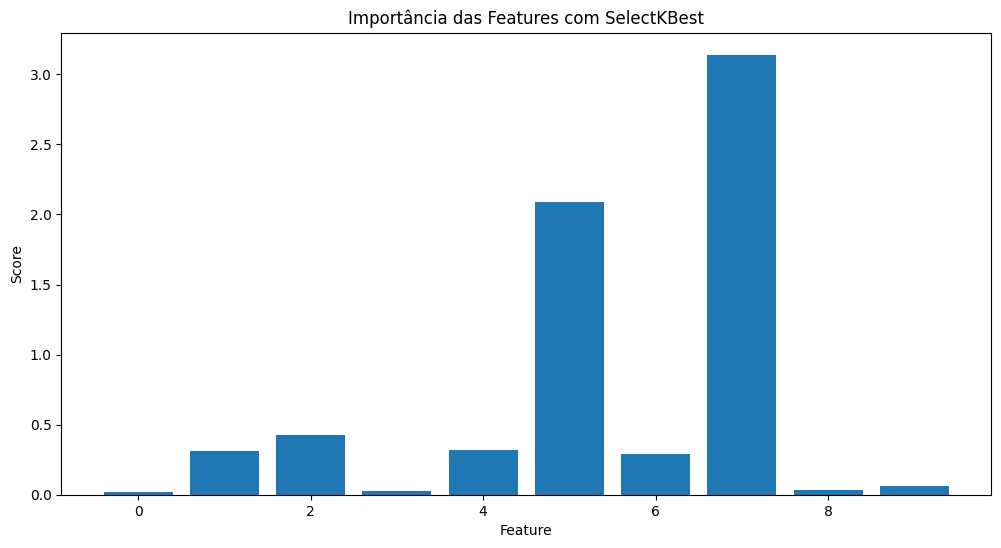

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)

# Aplicação do SelectKBest com ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Gráfico
scores = selector.scores_

plt.figure(figsize=(12, 6))
plt.bar(range(len(scores)), scores)
plt.title('Importância das Features com SelectKBest')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.show()

**Explicação**:
1. Geramos 100 pontos de dados com 10 features e um target binário aleatório.
2. Usamos `SelectKBest` com o teste ANOVA F para selecionar as 5 melhores features.
3. Visualizamos os scores das features em um gráfico de barras.

### Conclusão

Os gráficos apresentados demonstram como as diferentes técnicas de manipulação de dados afetam a distribuição e a seleção das features nos conjuntos de dados. Cada técnica tem seu propósito específico e pode ser escolhida com base nas características dos dados e nos objetivos do modelo de machine learning.